In [38]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

start_url = 'https://www.kijiji.ca/b-house-for-sale/gta-greater-toronto-area'
next_page_suffix = "/page-{page_number}"
page_num = 1
init_url = '/c35l1700272'

constructed_urls = []

total_page_count = 20

for page_number in range(1, total_page_count + 1):
    url = start_url + next_page_suffix.format(page_number=str(page_num)) + init_url
    constructed_urls.append(url)
    page_num += 1

list_of_dfs = []

for url in constructed_urls:
    try:
        page = requests.get(url)
        soup = BeautifulSoup(page.text, 'html.parser')
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch URL: {url}")
        continue
    
    divs = soup.find_all('div', class_='info-container')
    
    if not divs:
        print(f"No more listings on page: {url}")
        continue

    list_price = []
    list_title = []
    list_location = []
    list_posted = []

    for item in divs:
        price = item.find('div', class_='price').get_text(strip=True)
        title = item.find('a', class_='title').get_text(strip=True)
        location = item.find('span', class_="").get_text(strip=True)
        date_posted = item.find('span', class_='date-posted')
        if date_posted:
            list_posted.append(date_posted.get_text(strip=True))
        else:
            list_posted.append(None)
        list_price.append(price)
        list_title.append(title)
        list_location.append(location)

    data = {
        "Price": list_price,
        "Title": list_title,
        "Location": list_location,
        "Date Posted": list_posted,
    }

    df = pd.DataFrame(data)
    list_of_dfs.append(df)

    print(f"Scraped data from page: {url}")

final_df = pd.concat(list_of_dfs, ignore_index=True)


Scraped data from page: https://www.kijiji.ca/b-house-for-sale/gta-greater-toronto-area/page-1/c35l1700272
Scraped data from page: https://www.kijiji.ca/b-house-for-sale/gta-greater-toronto-area/page-2/c35l1700272
Scraped data from page: https://www.kijiji.ca/b-house-for-sale/gta-greater-toronto-area/page-3/c35l1700272
Scraped data from page: https://www.kijiji.ca/b-house-for-sale/gta-greater-toronto-area/page-4/c35l1700272
Scraped data from page: https://www.kijiji.ca/b-house-for-sale/gta-greater-toronto-area/page-5/c35l1700272
Scraped data from page: https://www.kijiji.ca/b-house-for-sale/gta-greater-toronto-area/page-6/c35l1700272
Scraped data from page: https://www.kijiji.ca/b-house-for-sale/gta-greater-toronto-area/page-7/c35l1700272
Scraped data from page: https://www.kijiji.ca/b-house-for-sale/gta-greater-toronto-area/page-8/c35l1700272
Scraped data from page: https://www.kijiji.ca/b-house-for-sale/gta-greater-toronto-area/page-9/c35l1700272
Scraped data from page: https://www.k

In [39]:
print(final_df)

              Price                                              Title  \
0    Please Contact  HELP!!! MISSISSAUGA BANK FORECLOSURE **MUST SE...   
1     $1,516,900.00  Brand New End-Unit Freehold Townhome in Oakvil...   
2     $1,150,000.00             HOME FOR SALE / REALTORS WELCOME AT 1%   
3    Please Contact                            Park Haus unit for sale   
4     $2,287,000.00                           Awesome Home In Oakville   
..              ...                                                ...   
895   $1,899,777.00                                   216 Chantenay Dr   
896   $3,499,000.00                                   161 Perryman Crt   
897   $1,499,900.00                                    30 Deseronto St   
898   $2,789,000.00                                    373496 6th Line   
899     $915,000.00                                   219 Elizabeth St   

                     Location     Date Posted  
0                 Mississauga      20/08/2023  
1              

In [44]:
#There are values like Mississauga and Mississauga/ Peel Regoion. We need to have similar category for grouping
final_df['Location'] = final_df['Location'].str.replace(' / Peel Region', '') \
                               .str.replace(' / Durham Region', '') \
                               .str.replace(' / Halton Region', '') \
                               .str.replace(' / York Region', '') \
                               .str.replace('City of ', '')
print(final_df)

              Price                                              Title  \
0    Please Contact  HELP!!! MISSISSAUGA BANK FORECLOSURE **MUST SE...   
1        1516900.00  Brand New End-Unit Freehold Townhome in Oakvil...   
2        1150000.00             HOME FOR SALE / REALTORS WELCOME AT 1%   
3    Please Contact                            Park Haus unit for sale   
4        2287000.00                           Awesome Home In Oakville   
..              ...                                                ...   
895      1899777.00                                   216 Chantenay Dr   
896      3499000.00                                   161 Perryman Crt   
897      1499900.00                                    30 Deseronto St   
898      2789000.00                                    373496 6th Line   
899       915000.00                                   219 Elizabeth St   

        Location     Date Posted  
0    Mississauga      20/08/2023  
1       Oakville      18/08/2023  
2    M

In [45]:
#There are values like Mississauga and Mississauga/ Peel Regoion. We need to have similar category for grouping
final_df['Price'] = final_df['Price'].str.replace('$', '') \
                               .str.replace(',', '')
#                               .str.replace('.00', '')
print(final_df)

              Price                                              Title  \
0    Please Contact  HELP!!! MISSISSAUGA BANK FORECLOSURE **MUST SE...   
1        1516900.00  Brand New End-Unit Freehold Townhome in Oakvil...   
2        1150000.00             HOME FOR SALE / REALTORS WELCOME AT 1%   
3    Please Contact                            Park Haus unit for sale   
4        2287000.00                           Awesome Home In Oakville   
..              ...                                                ...   
895      1899777.00                                   216 Chantenay Dr   
896      3499000.00                                   161 Perryman Crt   
897      1499900.00                                    30 Deseronto St   
898      2789000.00                                    373496 6th Line   
899       915000.00                                   219 Elizabeth St   

        Location     Date Posted  
0    Mississauga      20/08/2023  
1       Oakville      18/08/2023  
2    M

In [46]:
#There are values in the Price column as'Please  Contact'
#We need to replace these values with the median per of places per location
#We create first a dataframe where 'Please Contact'values are not included
df2 = final_df[final_df.Price != 'Please Contact']
print(df2)

          Price                                              Title  \
1    1516900.00  Brand New End-Unit Freehold Townhome in Oakvil...   
2    1150000.00             HOME FOR SALE / REALTORS WELCOME AT 1%   
4    2287000.00                           Awesome Home In Oakville   
5     770000.00                        End Unit Townhome in Oshawa   
6     999000.00                         Home and farmland for sale   
..          ...                                                ...   
895  1899777.00                                   216 Chantenay Dr   
896  3499000.00                                   161 Perryman Crt   
897  1499900.00                                    30 Deseronto St   
898  2789000.00                                    373496 6th Line   
899   915000.00                                   219 Elizabeth St   

        Location      Date Posted  
1       Oakville       18/08/2023  
2    Mississauga    < 3 hours ago  
4       Oakville   < 24 hours ago  
5         Oshaw

In [51]:
#there is also another value that we  can't determine the exact price
#so we will replace this with median too
df3 = df2[df2.Price != '189000.00225000.00']
print(df3)

          Price                                              Title  \
1    1516900.00  Brand New End-Unit Freehold Townhome in Oakvil...   
2    1150000.00             HOME FOR SALE / REALTORS WELCOME AT 1%   
4    2287000.00                           Awesome Home In Oakville   
5     770000.00                        End Unit Townhome in Oshawa   
6     999000.00                         Home and farmland for sale   
..          ...                                                ...   
895  1899777.00                                   216 Chantenay Dr   
896  3499000.00                                   161 Perryman Crt   
897  1499900.00                                    30 Deseronto St   
898  2789000.00                                    373496 6th Line   
899   915000.00                                   219 Elizabeth St   

        Location      Date Posted  
1       Oakville       18/08/2023  
2    Mississauga    < 3 hours ago  
4       Oakville   < 24 hours ago  
5         Oshaw

In [52]:
#get the median by location
median_prices = df3.groupby('Location')['Price'].median()
print(median_prices)

Location
Adjala-Tosorontio         2494500.0
Ajax                       899900.0
Alliston                   872900.0
Alton                      689950.0
Amaranth                  1325000.0
                            ...    
Vaughan                   1499999.0
Wasaga Beach               682400.0
Whitby                     924450.0
Whitchurch-Stouffville    1099394.0
toronto                      2700.0
Name: Price, Length: 69, dtype: object


In [53]:
#There are instances also that for a specific location the only price value is Please Contact
#therefore, we cannot get the median for that specific location
#instead, we can use the median of all the data
median = df3['Price'].median()
print(median)

997500.0


In [55]:
#change the Please contact value to the value of median
for index, row in final_df.iterrows():
    location = row['Location']
    if row['Price'] == 'Please Contact' or row['Price'] == '189000.00225000.00':
        if location in median_prices:
            final_df.loc[index, 'Price'] = median_prices[location]
        else:
            final_df.loc[index, 'Price'] = median

print(final_df)

          Price                                              Title  \
0      998000.0  HELP!!! MISSISSAUGA BANK FORECLOSURE **MUST SE...   
1    1516900.00  Brand New End-Unit Freehold Townhome in Oakvil...   
2    1150000.00             HOME FOR SALE / REALTORS WELCOME AT 1%   
3     1588000.0                            Park Haus unit for sale   
4    2287000.00                           Awesome Home In Oakville   
..          ...                                                ...   
895  1899777.00                                   216 Chantenay Dr   
896  3499000.00                                   161 Perryman Crt   
897  1499900.00                                    30 Deseronto St   
898  2789000.00                                    373496 6th Line   
899   915000.00                                   219 Elizabeth St   

        Location     Date Posted  
0    Mississauga      20/08/2023  
1       Oakville      18/08/2023  
2    Mississauga   < 3 hours ago  
3        Markham  <

In [56]:
#We need to convert first the values in Price Column from object to integer
final_df['Price'] = final_df['Price'].astype(float)

In [57]:
category_counts = final_df['Location'].value_counts()
result_df = pd.DataFrame({'Location': category_counts.index, 'Number of House Listing': category_counts.values})
print(result_df)

        Location  Number of House Listing
0        Toronto                      173
1    Mississauga                      151
2       Brampton                       91
3       Oakville                       83
4         Oshawa                       73
..           ...                      ...
70      Uxbridge                        1
71      Amaranth                        1
72        Mulmur                        1
73    North York                        1
74  Grand Valley                        1

[75 rows x 2 columns]


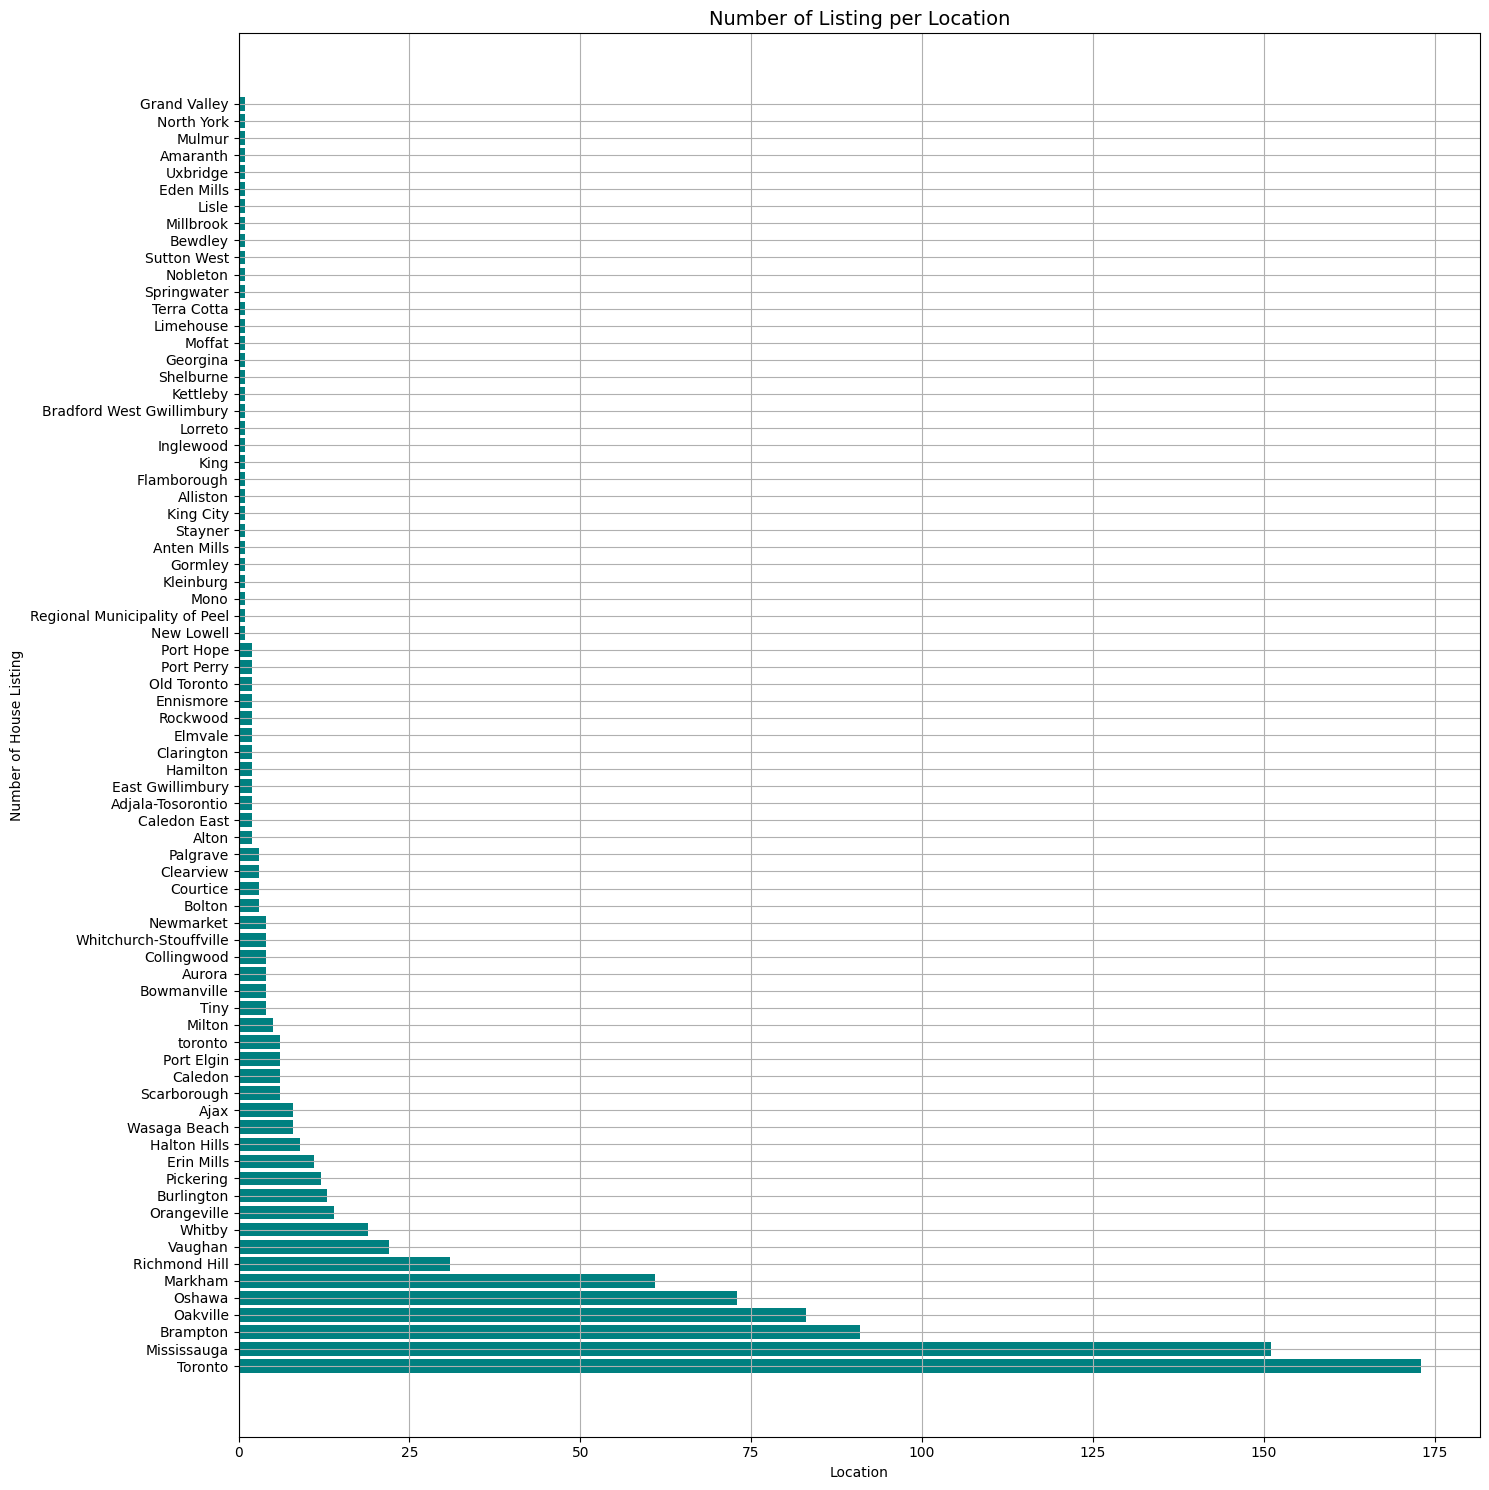

In [58]:
#graph the number of listing per location
plt.figure(figsize=(15, 15))
plt.barh(result_df['Location'], result_df['Number of House Listing'], color='teal')
plt.title('Number of Listing per Location', fontsize=14)
plt.xlabel('Location')
plt.ylabel('Number of House Listing')
plt.grid(True)
plt.tight_layout()

In [59]:
max_prices_per_location = final_df.groupby('Location')['Price'].max()
min_prices_per_location = final_df.groupby('Location')['Price'].min()

print("Maximum Prices per Location:")
print(max_prices_per_location)

print("\nMinimum Prices per Location:")
print(min_prices_per_location)

Maximum Prices per Location:
Location
Adjala-Tosorontio         2790000.0
Ajax                      2000000.0
Alliston                   872900.0
Alton                      879900.0
Amaranth                  1325000.0
                            ...    
Vaughan                   3490000.0
Wasaga Beach              1038000.0
Whitby                    1630000.0
Whitchurch-Stouffville    1369900.0
toronto                      2700.0
Name: Price, Length: 75, dtype: float64

Minimum Prices per Location:
Location
Adjala-Tosorontio         2199000.0
Ajax                       705000.0
Alliston                   872900.0
Alton                      500000.0
Amaranth                  1325000.0
                            ...    
Vaughan                    899000.0
Wasaga Beach               310500.0
Whitby                     699900.0
Whitchurch-Stouffville     899000.0
toronto                      2700.0
Name: Price, Length: 75, dtype: float64


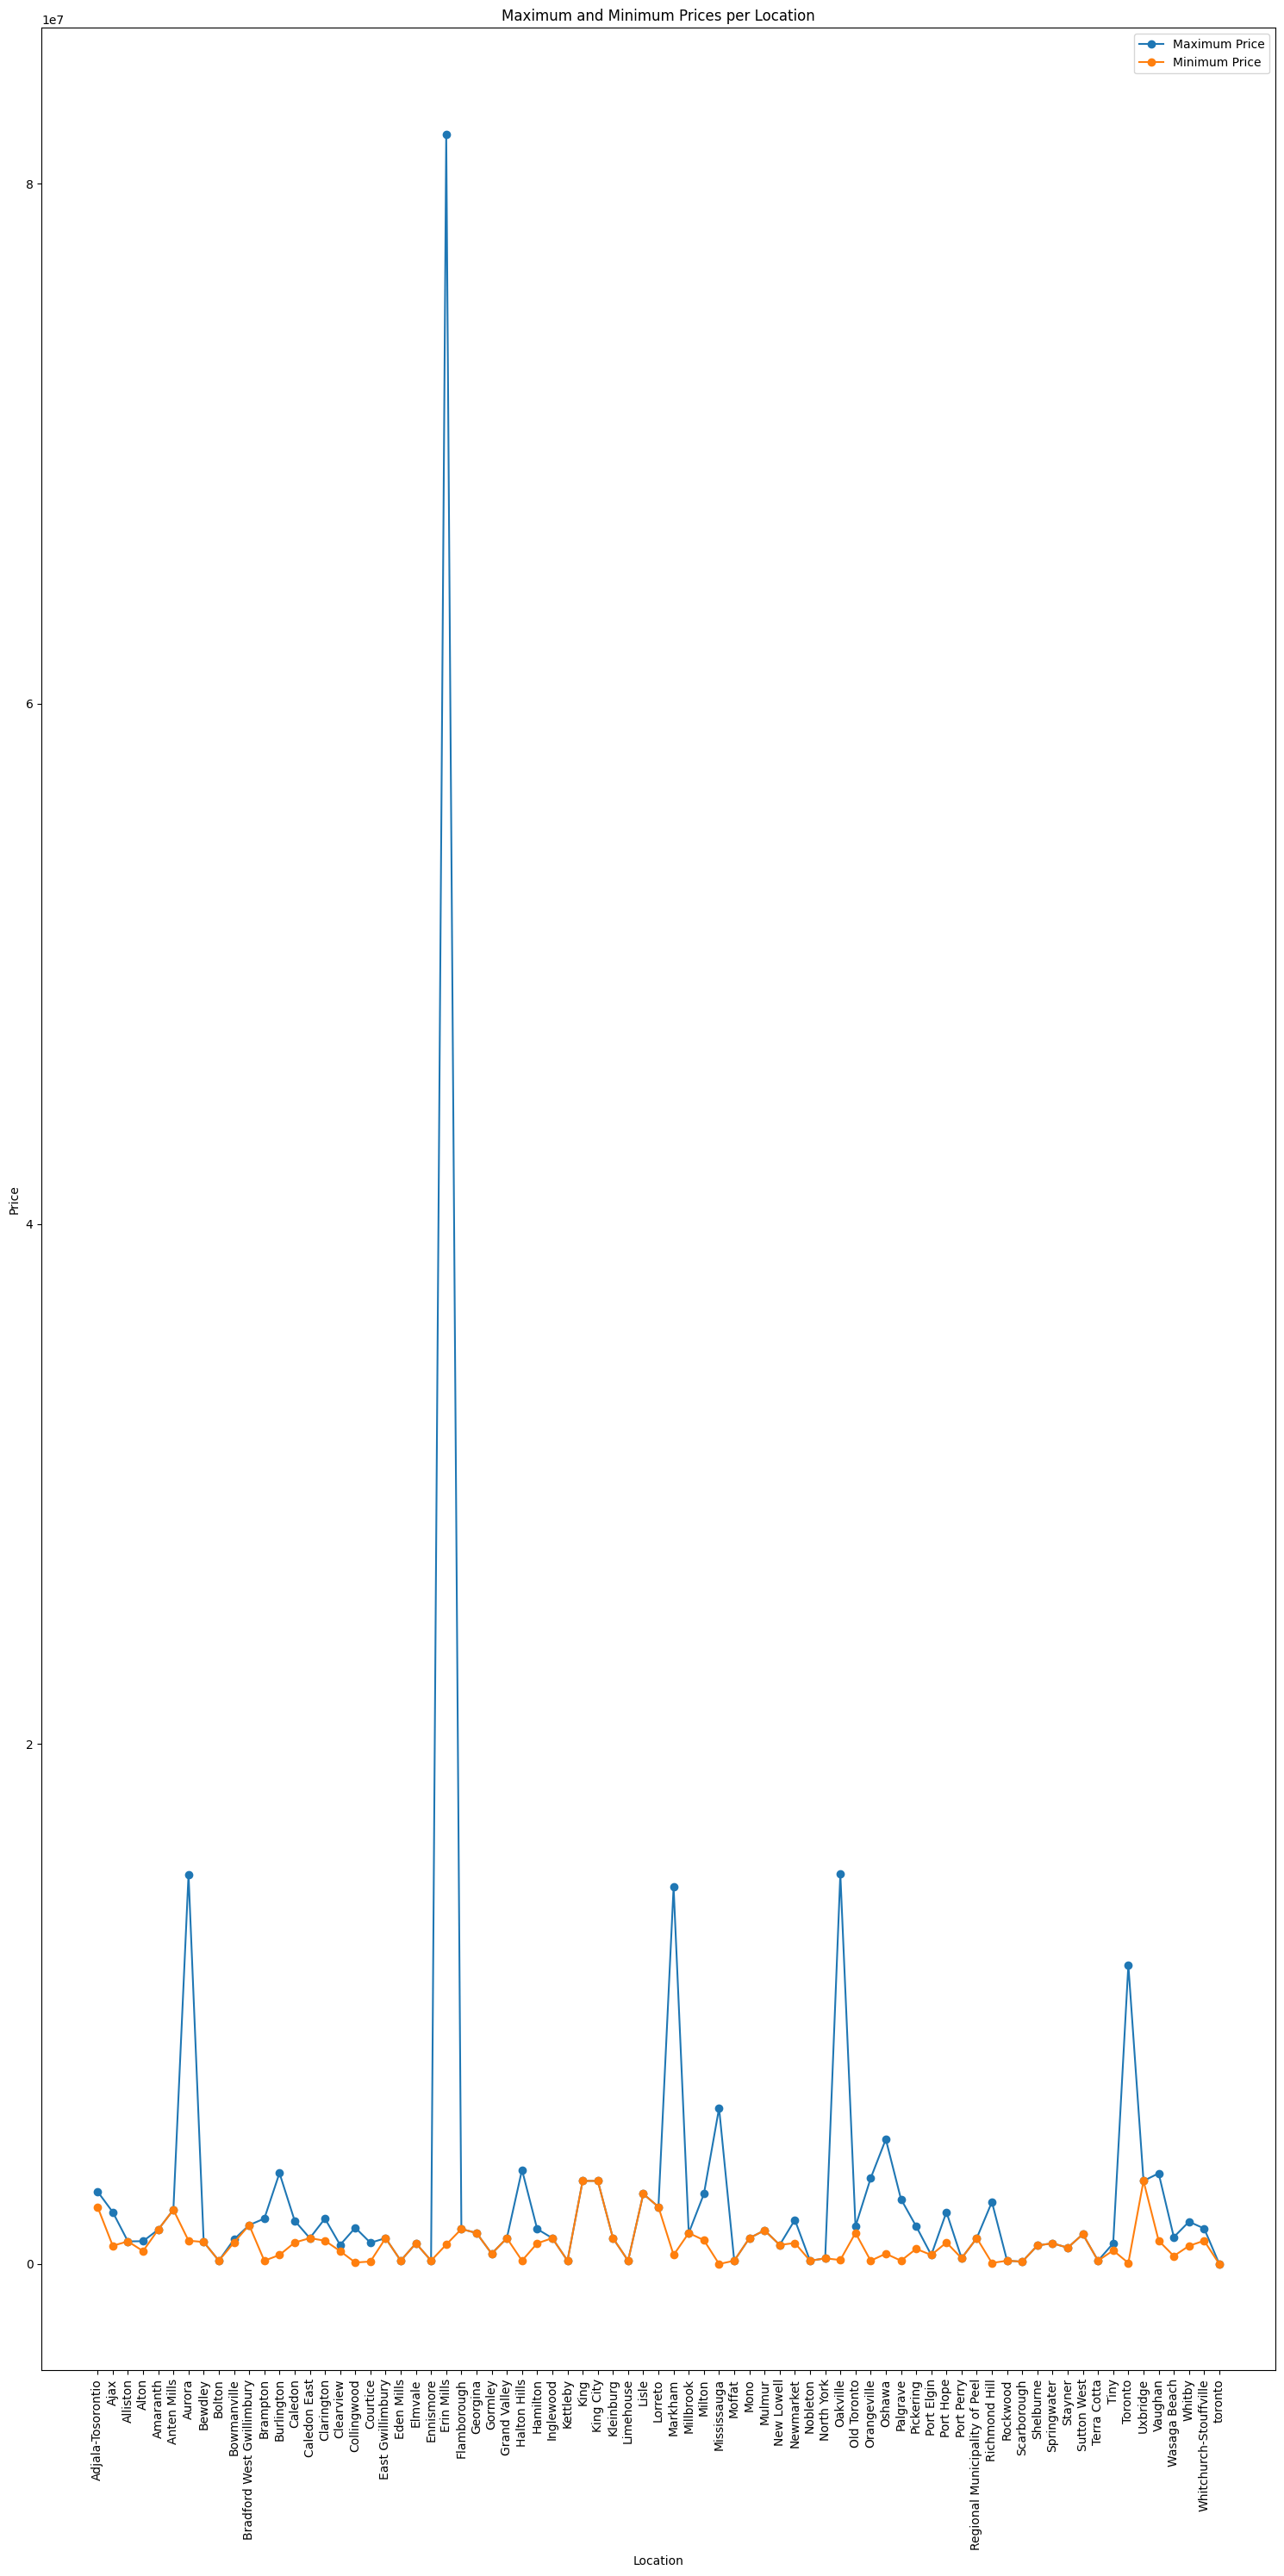

In [60]:
#Create a graph where the maximum and minimum price per shown are shown
fig, ax = plt.subplots(figsize=(15, 30))

# Plot maximum prices
ax.plot(max_prices_per_location.index, max_prices_per_location.values, marker='o', label='Maximum Price')

# Plot minimum prices
ax.plot(min_prices_per_location.index, min_prices_per_location.values, marker='o', label='Minimum Price')

# Add labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Price')
ax.set_title('Maximum and Minimum Prices per Location')
ax.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [61]:
#From the data we can create a boxplot where we can see the range of prices in different location
#We need to get first the quartiles
#df_final['Price'].quantile([0.25,0.50,  0.75])
quantiles_per_location = final_df.groupby('Location')['Price'].quantile([0.25, 0.50, 0.75])
print(quantiles_per_location)

Location                    
Adjala-Tosorontio       0.25    2346750.0
                        0.50    2494500.0
                        0.75    2642250.0
Ajax                    0.25     768750.0
                        0.50     899900.0
                                  ...    
Whitchurch-Stouffville  0.50    1099394.0
                        0.75    1242400.0
toronto                 0.25       2700.0
                        0.50       2700.0
                        0.75       2700.0
Name: Price, Length: 225, dtype: float64


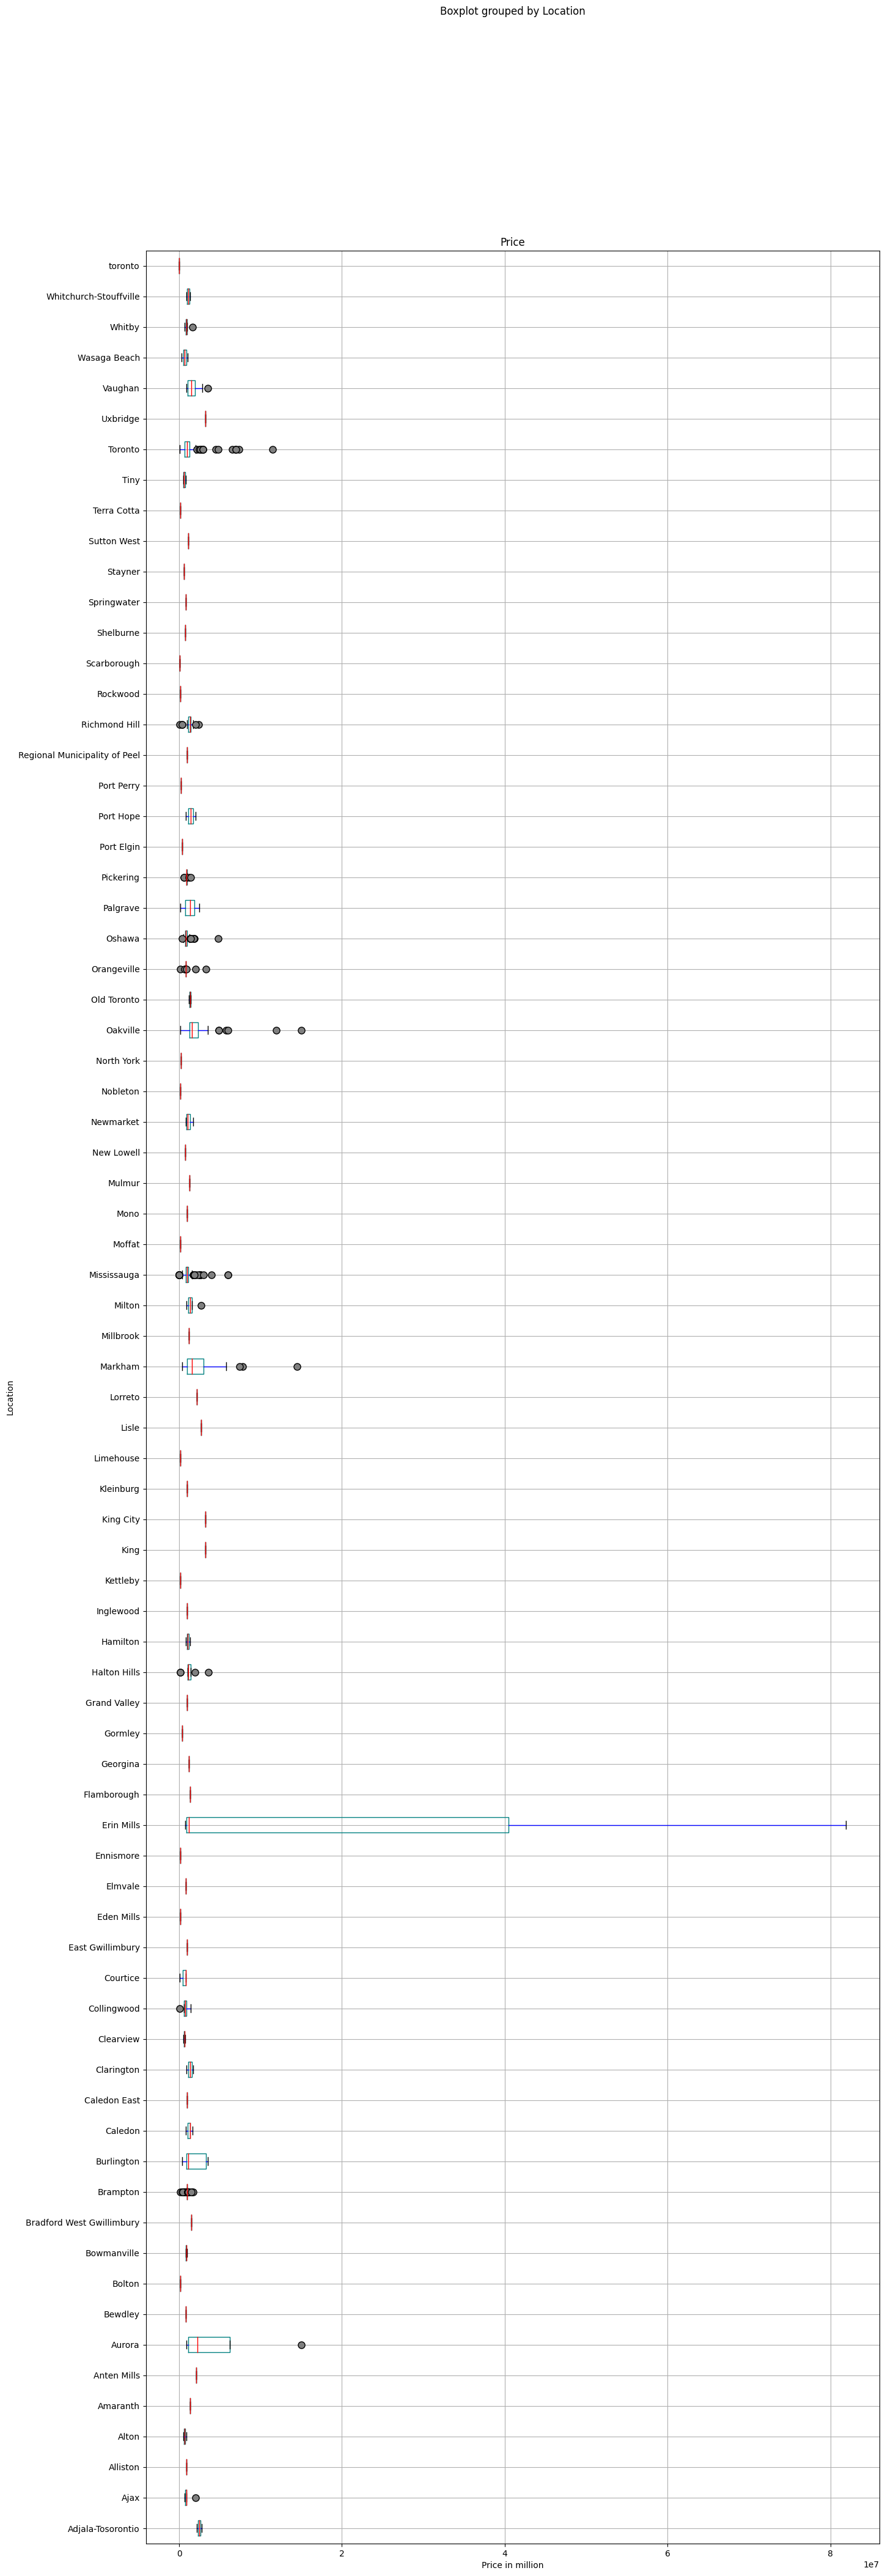

In [62]:
boxplot_color = 'teal'
median_color = 'red'
whisker_color = 'blue'

# Create a horizontal boxplot with customized colors
boxplot = final_df.boxplot(column=['Price'], by='Location', 
                     vert=False,
                     boxprops=dict(color=boxplot_color),
                     whiskerprops=dict(color=whisker_color),
                     medianprops=dict(color=median_color),
                     flierprops=dict(markerfacecolor='gray', marker='o', markersize=8),
                     figsize=(15, 50))

plt.xlabel('Price in million')
plt.ylabel('Location')

# Show the plot
plt.show()
